<a href="https://colab.research.google.com/github/bala-codes/Sentiment_Analysis_on_Amazon_Product_Reviews_Using_Machine_and_Deep_Learning/blob/master/codes%20(DL%20-%20RNN%20%26%20LSTM)/Part-3%20Sentiment%20Analysis%20-%20Prediction%20-%20Long%20Short%20Term%20Memory%20(LSTM)%20Single%20Input%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pickle
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('wordnet')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
to_replace = {"don't": "do not", "dont": "do not","doesn't": "does not", "doesnt": "does not","didn't": "did not", "didnt": "did not","shouldn't": "should not", "shouldnt": "should not",
              "haven't": "have not", "hvn't": "have not","havent": "have not", "hadn't": "had not","hadnt": "had not", "cannt": "can not","cann't": "can not", "couldn't": "could not",
              "couldnt": "could not", "nt": "not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
               "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
               "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
               "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
               "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
               "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
               "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
               "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
               "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
               "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
               "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
               "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

stopwords = ['i', 'me', 'mine', 'he', 'she', 'it', 'a', 'an', 'the','above', 'below', 'while', 'as', 'until', 'of', 'at', 'down', 'if', 'to', 'or', 'was', 'were', 'itself', 'for',
             'other', 'both', 'any', 'all', 'between', 'do', 'does', 'did', 'on', 'own', 'who', 'whom', 'this', 'that', 'has','have', 'here', 'some', 'why', 'same','so', 'is', 'be',
             'st', 'nd', 'rd', 'th']

import re

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

class NLP():
    def __init__(self, remove_stopwords=True, replace_words=True,
                 remove_numbers=True, remove_html_tags=True,
                 remove_punctuations=True, lemmatize=False,
                 lemmatize_method='wordnet'):
        """
        This package contains functions that can help during the
        preprocessing of text data.
        :param remove_stopwords: boolean
            default value = True
        :param replace_words: boolean
            default value = True
        """
        if (type(remove_stopwords) != bool or
            type(replace_words) != bool or
            type(remove_numbers) != bool or
            type(remove_html_tags) != bool or
            type(remove_punctuations) != bool or
            type(lemmatize) != bool):
            raise Exception("Error - expecting a boolean parameter")
        if lemmatize_method not in ['wordnet', 'snowball']:
            raise Exception("Error - lemmatizer method not supported")
        self.doc = None
        self.lemmatizer = None
        self.remove_stopwords = remove_stopwords
        self.replace_words = replace_words
        self.remove_numbers = remove_numbers
        self.remove_html_tags = remove_html_tags
        self.remove_punctations = remove_punctuations
        self.lemmatize_method = lemmatize_method
        self.lemmatize = lemmatize
        self.stopword_list = set(stopwords)
        self.replacement_list = to_replace
        if self.lemmatize_method == 'wordnet':
            self.lemmatizer = WordNetLemmatizer()
        if self.lemmatize_method == 'snowball':
            self.lemmatizer = SnowballStemmer('english')
    

    def remove_stopwords_fun(self):
        """
        This function removes stopwords from doc.
        It works by tokenizing the doc and then
        checking if the word is present in stopwords
        """
        tokens = str(self.doc).split()
        cleaned_tokens = [token for token in tokens
                          if token.lower() not in self.stopword_list]
        self.doc = ' '.join(cleaned_tokens)

    def replace_words_fun(self):
        """
        This function replaces words that are --
        by checking a word if a word is present in a dictionary
        if the word is present in dictionary then it is replaced
        with its value from dictionary
        """

        cleaned_doc = []
        for word in str(self.doc).split():
            if word.lower() in self.replacement_list.keys():
                cleaned_doc.append(self.replacement_list[word.lower()])
            else:
                cleaned_doc.append(word)
        self.doc = ' '.join(cleaned_doc)

    def remove_numbers_fun(self):
        """
        This function uses regex to remve
        all the numbers from the doc.
        """
        self.doc = re.sub("[0-9]", "", self.doc)

    def remove_html_tags_fun(self):
        """
        This function uses regex's complile method
        to remove all the HTML tags from the doc
        """
        cleaner = re.compile('<.*?>')
        cleaned_text = re.sub(cleaner, '', self.doc)
        cleaned_text = re.sub('[\n\t]', '', cleaned_text)
        self.doc = cleaned_text

    def remove_punctations_fun(self):
        """
        This function uses regex to remove alk the
        punctations from the doc.
        """ 
        self.doc = re.sub('[^a-zA-Z0-9]', ' ', self.doc)

    def lemmatize_fun(self):
        """
        This function applies the stemming to the words
        It can be operated with either WordNetLemmatizer
        or Snowball Stemmer
        ---------------------------
        Example:
        lemmatize(method='snowball')
        
        default value = 'wordnet
        """
        tokens = str(self.doc).split()
        cleaned_tokens = None
        if self.lemmatize_method == 'wordnet':
            cleaned_tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
        else:
            cleaned_tokens = [self.lemmatizer.stem(token) for token in tokens]
       
        self.doc = ' '.join(cleaned_tokens)

    def add_stopword(self, *args):
        """
        This function is used to add new stopwords
        to the predefined list
        Parameters - ["new_stopword"]
        ------------------------------
        Example -
        obj = NLP()
        obj.add_stopword(["first_word", "second_word"])
        """
        if self.remove_stopwords is False:
            raise Exception("Please enable removal of stopwords")
        if type(args) != list:
            raise Exception("Error - pass stopwords in list")
        for arg in args:
            self.stopword_list.add(arg)

    def add_replacement(self, *args):
        """
        This function is used to add new replacement words
        to the predifined list
        Parameters - [  = ""]
        ----------------------------
        Example -
        obj = NLP()
        obj.add_replacement([first: "replacement1", second: "replacement2"])
        """
        if self.replace_words is False:
            raise Exception("Please enable cleaning of stopwords")
        if type(args) != list:
            raise Exception("Error - pass input parameters in list")
        if args == []:
            raise Exception("Error - list is empty")
        try:
            for key, value in args.items():
                self.replacement_list[key] = value
        except:
            print("Expected args in dict format")

    def remove_stopwords(self, *args):
        """
        This function is used to remove stopwords from predefined list
        Parameters - ["first_word"]
        ------------------------------
        Example
        obj = NLP()
        obj.remove_stopwords(['new_stopword_here'])
        """
        if self.remove_stopwords is False:
            raise Exception("Error - enable stopword removal functionality")
        if type(args) != list:
            raise Exception("Error - expected a list")
        if args == []:
            raise Exception("Error - no items to remove from stopword list")
        for arg in args:
            if arg in self.stopword_list:
                self.stopword_list.remove(arg)
            else:
                raise Exception(arg+" not in list")

    def print_stopwords(self):
        """
        This function prints all the stopwords
        that are present in the list
        Return Type - list
        ------------------------------
        Example
        obj = NLP()
        obj.print_stopwords()
        """
        if self.stopword_list == []:
            raise Exception("Error - stopword list is empty")
        print(self.stopword_list)

    def process(self, doc):
        """
        This function processes the doc
        If the remove_stopwords flag is True
            - it will remove stopwords from doc
        If the clean_words flag is True
            - it will clean the doc by replacing words
        Parameters - [doc]
        ------------------------------
        Example
        obj = NLP()
        obj.process(["process this text"])
        How to use with pandas?
        obj = NLP()
        df = df['text].apply(obj.process)
        """
        self.doc = doc
        if self.replace_words is True:
            self.replace_words_fun()
        if self.remove_html_tags is True:
            self.remove_html_tags_fun()
        if self.remove_stopwords is True:
            self.remove_stopwords_fun()
        if self.remove_numbers is True:
            self.remove_numbers_fun()
        if self.remove_stopwords is True:
            self.remove_stopwords_fun()
        if self.remove_punctations is True:
            self.remove_punctations_fun() 
        if self.lemmatize is True:
            self.lemmatize_fun()
        return self.doc


In [ ]:
def plot_preds1(val1, val2):
  class_labels = ['POSITIVE', 'NEGATIVE']
  j = [val1, val2]
  y_pos = np.arange(len(class_labels))
  colors = ['g','r']
  plt.barh(y_pos,j, color = colors, alpha = 0.6)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING POSITIVE VS NEGATIVE SENTIMENTS')
  plt.xlabel('Percentage')
  plt.ylabel('Labels')
  plt.show()


def plot_preds2(val1, val2):
  class_labels = ['NEGATIVE','POSITIVE']
  j = [val1, val2]
  y_pos = np.arange(len(class_labels))
  colors = ['g', 'r']
  plt.barh(y_pos,j, color = colors, alpha = 0.6)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING POSITIVE VS NEGATIVE SENTIMENTS')
  plt.xlabel('Percentage')
  plt.ylabel('Labels')
  plt.show()

In [ ]:
# Use the below function to load the Saved Tokenizer
with open('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Keras Embeddings/LSTM_Keras_Emb.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

import tensorflow as tf 
from keras.preprocessing.sequence import pad_sequences
maxlen = 300

nn_emb_model = tf.keras.models.load_model('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Keras Embeddings/salstmkerasemb.h5') 

def prediction(x):
  process1 = tokenizer.texts_to_sequences(x)
  #print("P1",process1)
  process2 = pad_sequences(process1, padding='post', maxlen=maxlen)
  #print("P3",process2)
  prediction = nn_emb_model.predict(process2)
  prediction = np.squeeze(prediction)
  val1 = np.squeeze(prediction)
  val2 = 1 - np.squeeze(prediction)

  value1 = "The Given Review is a Positive Sentiment"
  value0 = "The Given Review is a Negative Sentiment"
  if prediction >= 0.5:
    plot_preds1(val1 , val2)
    return value1
  else:
    plot_preds1(val1 , val2)
    return value0

ENTER THE USER'S COMMENT HERE : The product was good, not bad at all.



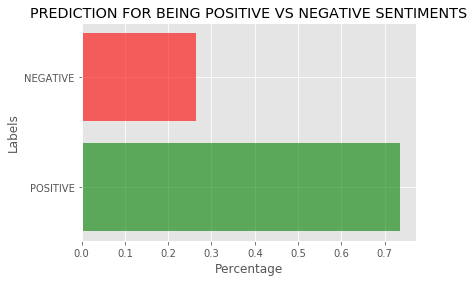



 The Given Review is a Positive Sentiment


In [ ]:
x = input("ENTER THE USER'S COMMENT HERE : ") 
text_cleaner = NLP()
x = text_cleaner.process([x])
x=[x,]
print()
print("\n\n",prediction(x))

ENTER THE USER'S COMMENT HERE : The product was bad, not good at all.



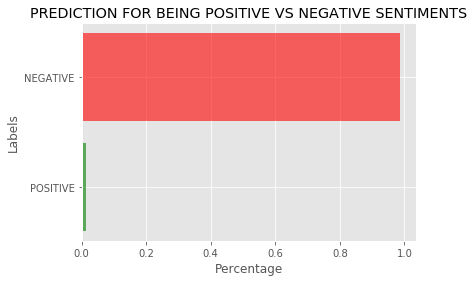



 The Given Review is a Negative Sentiment


In [ ]:
x = input("ENTER THE USER'S COMMENT HERE : ") 
text_cleaner = NLP()
x = text_cleaner.process([x])
x=[x,]
print()
print("\n\n",prediction(x))

In [ ]:
nn_emb_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 128)          9057664   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 300, 32)           16416     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 300, 32)           4128      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 150, 32)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 150, 128)          82432     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)              